# Programming

## Install Packages

In [9]:
!pip install --upgrade pip
!pip install pandas
!pip install scipy
!pip install sklearn
!pip install scikit-learn
!pip install matplotlib
!pip install --force-reinstall https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz

  Using cached https://github.com/mwaskom/seaborn/archive/refs/heads/master.tar.gz
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for numpy!=1.24.0,>=1.20 from https://files.pythonhosted.org/packages/9b/5a/f265a1ba3641d16b5480a217a6aed08cceef09cd173b568cd5351053472a/numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Obtaining dependency information for pandas>=1.2 from https://files.pythonhosted.org/packages/2f/0e/3b74e8f7c908082793adafb02753477f653ccd7e189f3ba070757d2d0e65/pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib!=3.6.1,>=3.3 from https://f

### Import File

In [2]:
from scipy.io.arff import loadarff
import pandas as pd


# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

### 1) discriminative power
Apply f_classif from sklearn to assess the discriminative power of the input variables.  
Identify the input variable with the highest and lowest discriminative power.  
Plot the class-conditional probability density functions of these two input variables.

Feature with Highest Discriminative Power:
degree_spondylolisthesis

Feature with Lowest Discriminative Power:
pelvic_radius


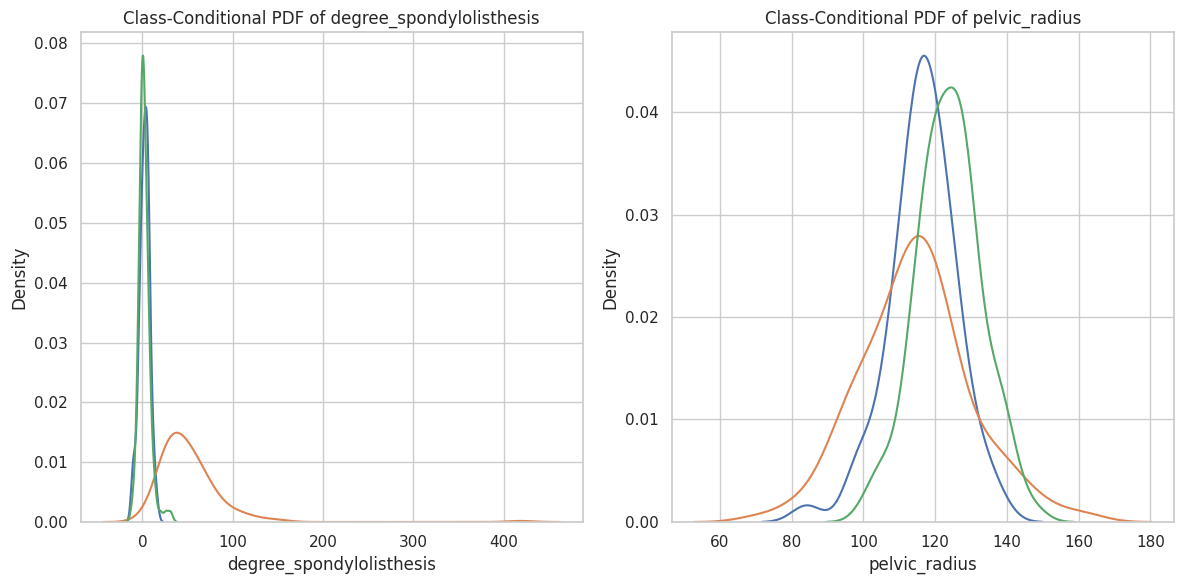

In [3]:
# Some of the sklearn facilities require input data to be separated from output data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.feature_selection import f_classif
import seaborn as sns
import matplotlib.pyplot as plt

fimportance = f_classif(X, y)

# Find the index of the input variable with the highest and lowest F-scores
highest_discriminative_index = fimportance[0].argmax()
lowest_discriminative_index = fimportance[0].argmin()

print("Feature with Highest Discriminative Power:")
print(X.columns[highest_discriminative_index])
print("\nFeature with Lowest Discriminative Power:")
print(X.columns[lowest_discriminative_index])

# Plot class-conditional probability density functions of the two selected features
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for class_name in df['class'].unique():
    sns.kdeplot(X[y == class_name].iloc[:, highest_discriminative_index], label=class_name)
plt.title(f'Class-Conditional PDF of {X.columns[highest_discriminative_index]}')

plt.subplot(1, 2, 2)
for class_name in df['class'].unique():
    sns.kdeplot(X[y == class_name].iloc[:, lowest_discriminative_index], label=class_name)
plt.title(f'Class-Conditional PDF of {X.columns[lowest_discriminative_index]}')

plt.tight_layout()
plt.show()

### 2) 

Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a
single plot both the training and testing accuracies of a decision tree with depth limits in
{1,2,3,4,5,6,8,10} and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non-deterministic
in sklearn, hence you may opt to average the results using 10 runs per parameterization.

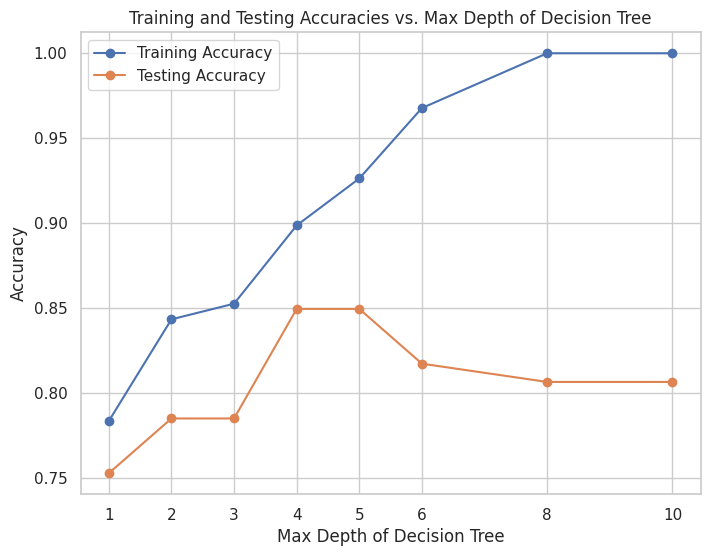

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

random_seed = 0
np.random.seed(random_seed)
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed, stratify=y)

train_accuracies = []
test_accuracies = []
for depth in depth_limits:
    # Create and fit a Decision Tree Classifier with the specified depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)

    # Predict on training and testing data
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 6))
plt.xticks(depth_limits)
plt.plot(depth_limits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_limits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Max Depth of Decision Tree')
plt.legend()
plt.show()

### 3) Comment on the results
Comment on the results, including the generalization capacity across settings.

- Training vai sempre aumentando até atingir accuracy = 1 quando depth=10 -> capturing even the smallest details and noise
- Testing aumenta até ao 4/5 e depois começa a cair
clear sign of overfitting (The model has essentially memorized the training data rather than learning its underlying patterns)
Logo, perde se generalization capacity

Observando o plot criado podemos analisar a diferença de resultados entre training e testing para os diferentes niveis de profundidade.

Começando pelo training, observamos que a sua accuracy vai sempre aumentado à medida que a profundidade aumenta, atingindo o seu valor máximo quando a profundidade da decision tree é 10. Isto indica que o modelo está a ajustar se ao dados de training, capturando todos os mais pequenos detalhes.

No entanto, quando olhamos para a precisão do testing, reparamos que esta só vai aumentando até à profundidade 4 e que começa a diminuir a partir da profundidade 5.  
Isto parece um claro sinal de overfitting, isto é, o modelo ajustou-se demasiado aos dados de training, acabando por os decorar ao invés de, de facto, learning its underlying patterns, perdendo assim a sua capacidade de generalização.

Observing the created plot, we can analyze the difference between training and testing accuracy results for different levels of depth.

Starting with the training data, we can see that its accuracy consistently increases as the depth of the decision tree increases, reaching its maximum value when the depth of the decision tree is 10. This indicates that the model is fitting itself to the training data, capturing even the smallest details.

However, when we look at the testing data's accuracy, we notice that it only increases up to a depth of 4 and starts to decrease from depth 5 onwards.  This appears to be a clear sign of overfitting, where the model has over-adapted to the training data, essentially memorizing it rather than actually learning its underlying patterns, thus losing its ability to generalize.

### 4) 
To deploy the predictor, a healthcare team opted to learn a single decision tree
(random_state=0) using all available data as training data, and further ensuring that each leaf has
a minimum of 20 individuals in order to avoid overfitting risks.  
i. Plot the decision tree.  
ii. Characterize a hernia condition by identifying the hernia-conditional associations.

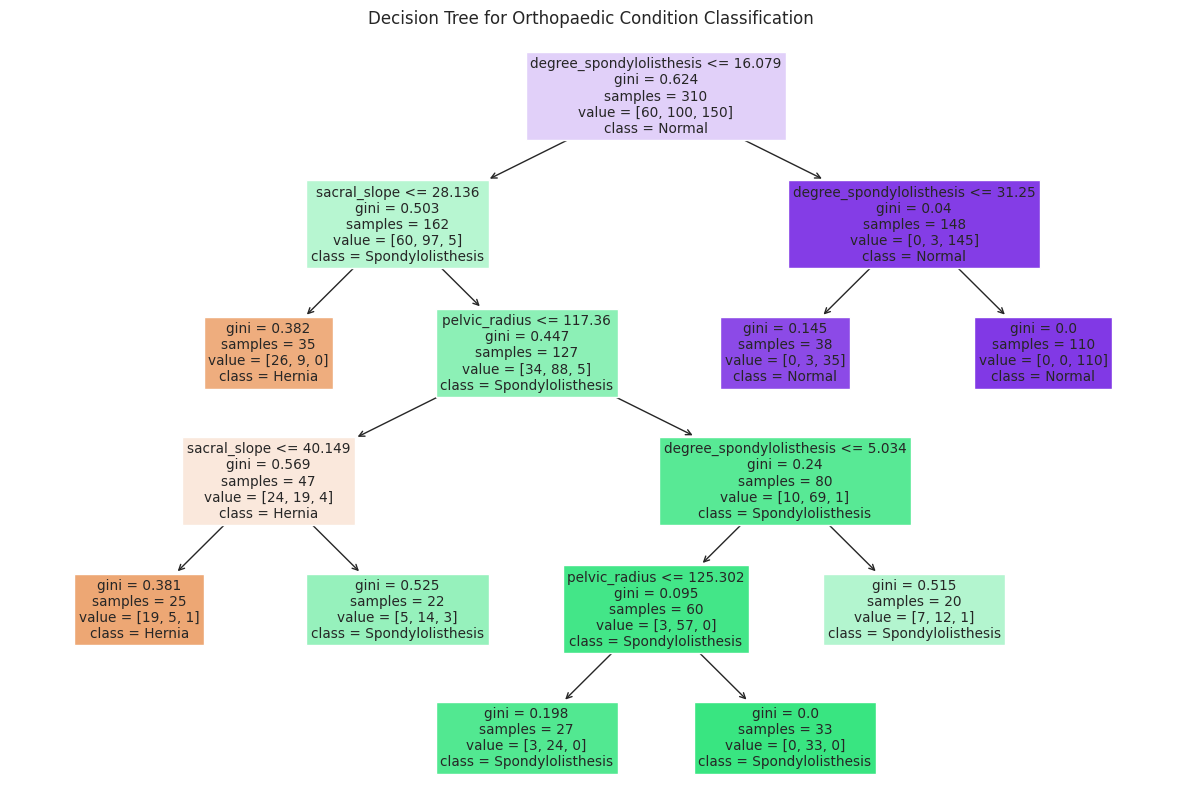

In [13]:
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier with a max depth that ensures at least 20 individuals in each leaf
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.title("Decision Tree for Orthopaedic Condition Classification")
plt.show()

Tal como podemos analisar, a hernia condition está principalmente associada aos valores de degree_spondylolisthesis, sacral_slope e de pelvic_radius.
Para valores de degree_spondylolisthesis maiores do que 16.079 é bastante improvavel a existencia de Hernia. 
Caso isto não ocorra, valores de sacral_slope menores ou iguais a 28.136 podem indicar a condição de Hernia.
Podemos ainda verificar que valores de sacral_slope compreendidos entre 28.136 e 40.149, poderam também ser um indicador, caso o pelvic_radius seja menor ou igual a 117.36.

Tal como podemos analisar, a hernia condition está principalmente associada aos valores de degree_spondylolisthesis, sacral_slope e de pelvic_radius.
Quando "degree_spondylolisthesis" é maior que 16.079, é improvável que a hérnia esteja presente.
Se "degree_spondylolisthesis" for menor ou igual a 16.079, a análise concentra-se em "sacral_slope". 
Valores de "sacral_slope" menores ou iguais a 28.136 podem indicar a condição de hérnia. 
Portanto, valores mais altos de "sacral_slope" podem estar associados a uma menor probabilidade de hérnia.
No entanto, podemos ainda verificar que se "sacral_slope" estiver compreendido entre 28.136 e 40.149, a condição de hérnia pode ainda ser relevante, se o "pelvic_radius" for menor ou igual a 117.36.

As we can see, the hernia condition is primarily associated with the values of "degree_spondylolisthesis", "sacral_slope" and "pelvic_radius".

When "degree_spondylolisthesis" is greater than 16.079, it is unlikely that a hernia is present.

If "degree_spondylolisthesis" is less than or equal to 16.079, the analysis focuses on "sacral_slope": values of "sacral_slope" less than or equal to 28.136 may indicate the hernia condition.  
Therefore, higher values of "sacral_slope" may be associated with a lower probability of hernia.

However, we can still check that if "sacral_slope" falls between 28.136 and 40.149, the hernia condition may still be relevant if "pelvic_radius" is less than or equal to 117.36.

In [20]:
def describe_decision_tree(tree_classifier, feature_names, class_names):
    tree = tree_classifier.tree_
    n_nodes = tree.node_count
    children_left = tree.children_left
    children_right = tree.children_right
    threshold = tree.threshold
    values = tree_classifier.tree_.value

    def recurse(node, depth):
        indent = "  " * depth
        if children_left[node] == children_right[node]:  # leaf node
            class_id = np.argmax(values[node])
            description.append(f"{indent}Values: {values[node]}\tClass: {class_names[class_id]} ")
        else:  # decision node
            feature = feature_names[tree.feature[node]]
            threshold_val = threshold[node]
            description.append(f"{indent}If {feature} <= {threshold_val}:")
            recurse(children_left[node], depth + 1)
            description.append(f"{indent}else:")
            recurse(children_right[node], depth + 1)

    description = []
    recurse(0, 0)
    return "\n".join(description)



# Describe the decision tree
tree_description = describe_decision_tree(clf, feature_names=X.columns, class_names=["Normal", "Disk Hernia", "Spondilolysthesis"])

# Print the description
print(tree_description)

If degree_spondylolisthesis <= 16.078891277313232:
  If sacral_slope <= 28.13647174835205:
    Values: [[26.  9.  0.]]	Class: Normal 
  else:
    If pelvic_radius <= 117.35956192016602:
      If sacral_slope <= 40.1485710144043:
        Values: [[19.  5.  1.]]	Class: Normal 
      else:
        Values: [[ 5. 14.  3.]]	Class: Disk Hernia 
    else:
      If degree_spondylolisthesis <= 5.034274339675903:
        If pelvic_radius <= 125.30192565917969:
          Values: [[ 3. 24.  0.]]	Class: Disk Hernia 
        else:
          Values: [[ 0. 33.  0.]]	Class: Disk Hernia 
      else:
        Values: [[ 7. 12.  1.]]	Class: Disk Hernia 
else:
  If degree_spondylolisthesis <= 31.24958896636963:
    Values: [[ 0.  3. 35.]]	Class: Spondilolysthesis 
  else:
    Values: [[  0.   0. 110.]]	Class: Spondilolysthesis 
